# ResNet for Object Classification in PyTorch with CUDA

Used dataset: CIFAR-10


---

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Check for CUDA availability and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


---

### Data Loading and Preprocessing

Next, we'll load the CIFAR-10 dataset. We will apply transformations to normalize the image data.

In [ ]:
# Define transformations for the training and test sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

# Download and load the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

# Download and load the test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

# Define the classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:57<00:00, 2.95MB/s] 


---

In [3]:
# Load a pre-trained ResNet-18 model and modify the final layer
model = torchvision.models.resnet18(pretrained=False) # Set to False to train from scratch
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Move the model to the GPU
model = model.to(device)

/home/musaib/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/musaib/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


---

### Training the Model

Now, we'll define a loss function and an optimizer and then proceed to train our model.

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
num_epochs = 15

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
    
    scheduler.step()

print('Finished Training')

[Epoch 1, Batch 100] loss: 1.871
[Epoch 1, Batch 200] loss: 1.523
[Epoch 1, Batch 300] loss: 1.387
[Epoch 2, Batch 100] loss: 1.169
[Epoch 2, Batch 200] loss: 1.132
[Epoch 2, Batch 300] loss: 1.089
[Epoch 3, Batch 100] loss: 0.888
[Epoch 3, Batch 200] loss: 0.905
[Epoch 3, Batch 300] loss: 0.885
[Epoch 4, Batch 100] loss: 0.703
[Epoch 4, Batch 200] loss: 0.739
[Epoch 4, Batch 300] loss: 0.746
[Epoch 5, Batch 100] loss: 0.581
[Epoch 5, Batch 200] loss: 0.624
[Epoch 5, Batch 300] loss: 0.617
[Epoch 6, Batch 100] loss: 0.367
[Epoch 6, Batch 200] loss: 0.331
[Epoch 6, Batch 300] loss: 0.305
[Epoch 7, Batch 100] loss: 0.240
[Epoch 7, Batch 200] loss: 0.220
[Epoch 7, Batch 300] loss: 0.215
[Epoch 8, Batch 100] loss: 0.162
[Epoch 8, Batch 200] loss: 0.166
[Epoch 8, Batch 300] loss: 0.166
[Epoch 9, Batch 100] loss: 0.106
[Epoch 9, Batch 200] loss: 0.114
[Epoch 9, Batch 300] loss: 0.116
[Epoch 10, Batch 100] loss: 0.075
[Epoch 10, Batch 200] loss: 0.071
[Epoch 10, Batch 300] loss: 0.078
[Epoch 

---

### Evaluating the Model

Finally, let's evaluate the performance of our trained model on the test dataset.

In [5]:
correct = 0
total = 0
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 73.02 %


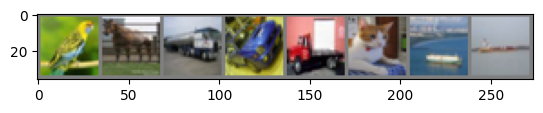

bird  horse truck car   truck cat   ship  ship 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images in a grid
imshow(torchvision.utils.make_grid(images[:8]))

# Print the labels for the displayed images
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))